<a href="https://colab.research.google.com/github/FHCampbell71/ComputationalStats/blob/main/CS_Assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Causal Discovery from Observational Data

## PC algorithm

In [ ]:
!pip install ges
!pip install castle
!pip install gcastle==1.0.3
import ges
import castle

In [ ]:
import os
os.environ['CASTLE_BACKEND'] = 'pytorch'

from collections import OrderedDict
import warnings

import numpy as np
import networkx as nx
import pandas as pd

from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import IIDSimulation, DAG
from castle.algorithms import PC, ICALiNGAM, GOLEM

import matplotlib.pyplot as plt

In [ ]:
# Mute warnings - for the sake of presentation clarity
# Should be removed for real-life applications
warnings.simplefilter('ignore')

In [ ]:
# Loads data
df = pd.read_csv("a1_data.csv")

In [ ]:
list_name = []
for index,row in df.iteritems():
  list_name.append(index)

In [ ]:
# To matrix
pc_dataset = df

In [ ]:
# Sanity check
pc_dataset, pc_dataset.shape

(              A         B         C         D         E         F         G  \
 0      3.179665  3.030625  3.222752  2.836624  3.386284  1.910165  2.179628   
 1      3.313155  3.127535  3.367189  2.799483  2.527001  2.359419  2.461049   
 2      3.531847  3.554489  3.441636  2.582776  2.730851  2.263097  2.461049   
 3      3.621384  3.828081  3.640896  2.704508  1.727649  1.855651  2.021082   
 4      3.285691  3.206716  2.992451  2.562289  3.011359  2.414187  2.612864   
 ...         ...       ...       ...       ...       ...       ...       ...   
 11667  3.793141  3.921324  3.895300  3.000136  2.883361  2.333931  2.847800   
 11668  3.469416  3.491603  3.629846  2.898924  2.700522  2.953265  3.093751   
 11669  3.550766  3.480149  3.653584  2.859884  2.535938  1.754421  2.606183   
 11670  3.641136  3.679161  3.137581  2.870503  2.706313  2.773593  2.882737   
 11671  3.586360  2.832224  3.242749  3.792578  2.887171  2.085967  2.402463   
 
               H         I         J  

In [ ]:
# Build the model
pc = castle.algorithms.PC()
pc.learn(pc_dataset)

In [ ]:
pc.causal_matrix

Tensor([[0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [ ]:
np.sum(pc.causal_matrix,axis=1) # row out
np.sum(pc.causal_matrix,axis=0) # column in

Tensor([5, 2, 1, 3, 1, 5, 1, 3, 3, 0, 1])

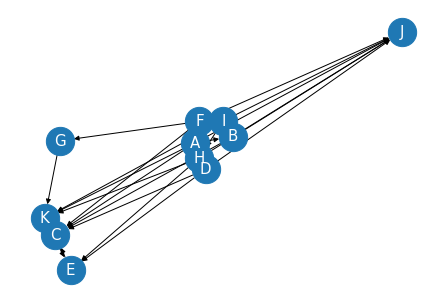

In [ ]:
# Get learned graph
learned_graph = nx.DiGraph(pc.causal_matrix)

# Relabel the nodes
MAPPING = {k: v for k, v in zip(range(len(list_name)), list_name)}
learned_graph = nx.relabel_nodes(learned_graph, MAPPING, copy=True)

# Plot the graph
nx.draw(
    learned_graph, 
    with_labels=True,
    node_size=800,
    font_size=15,
    font_color='white'
)

## Gradient-based Optimization of dag-penalized Likelihood for learning linEar dag Models (GOLEM)

In [ ]:
GOLEM = castle.algorithms.GOLEM()
GOLEM.learn(pc_dataset)

In [ ]:
GOLEM.causal_matrix

##  Linear Non-Gaussian Acyclic Model  (LiNGAM)

In [ ]:
ICALiNGAM = castle.algorithms.ICALiNGAM()
ICALiNGAM.learn(pc_dataset)

In [ ]:
ICALiNGAM.causal_matrix

Tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

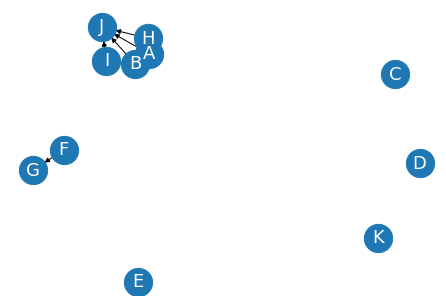

In [ ]:
# Get learned graph
learned_graph = nx.DiGraph(ICALiNGAM.causal_matrix)

# Relabel the nodes
MAPPING = {k: v for k, v in zip(range(len(list_name)), list_name)}
learned_graph = nx.relabel_nodes(learned_graph, MAPPING, copy=True)

# Plot the graph
nx.draw(
    learned_graph, 
    with_labels=True,
    node_size=800,
    font_size=18,
    font_color='white'
)

## FCI 


In [ ]:
!pip install causal-learn
from causallearn.search.ConstraintBased.FCI import fci

In [ ]:
df_np = df.to_numpy()
fci(df_np)

In [ ]:
# or customized parameters
G, edges = fci(df_np)
# visualization
from causallearn.utils.GraphUtils import GraphUtils
pdy = GraphUtils.to_pydot(G, labels=list_name)
pdy.write_png('fci.png')


  0%|          | 0/11 [00:00<?, ?it/s]

X3 --> X1
X1 --> X10
X2 --> X3
X8 --> X9
